# Day 2 Analysis: NYC High School Directory

This notebook explores the **NYC High School Directory** dataset using Pandas. We'll perform basic cleaning, answer a few business questions, and create simple visualizations.

## Setup and Data Load

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure inline plots in Jupyter environments
%matplotlib inline

file_path = '/content/high-school-directory.csv'
df = pd.read_csv(file_path)

# Peek at the raw data
df.head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Council District,Census Tract,BIN,BBL,NTA,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12


## Clean Column Names
Standardize column names to be lowercase with underscores and no special characters.

In [13]:
# Clean column names: lowercase, replace spaces with underscores, remove special characters
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace(r'[^\w\s]', '', regex=True)
)
df.columns.tolist()[:10]

['dbn',
 'school_name',
 'borough',
 'building_code',
 'phone_number',
 'fax_number',
 'grade_span_min',
 'grade_span_max',
 'expgrade_span_min',
 'expgrade_span_max']

## Business Questions

In [14]:
# 1) How many total schools are in Brooklyn?
brooklyn_schools_count = df[df['borough'].str.lower() == 'brooklyn'].shape[0]

# 2) How many offer Grade 9 entry? (i.e., grade_span_min == 9)
grade9_count = df[df['grade_span_min'] == 9].shape[0]

# 3) Summary of grade_span_max grouped by borough
grade_span_summary = df.groupby('borough')['grade_span_max'].describe()

brooklyn_schools_count, grade9_count, grade_span_summary.head()


(121,
 351,
                count       mean       std   min   25%   50%   75%   max
 borough                                                                
 Bronx          118.0  11.906780  0.369506   9.0  12.0  12.0  12.0  12.0
 Brooklyn       121.0  11.933884  0.381566   9.0  12.0  12.0  12.0  12.0
 Manhattan      106.0  11.877358  0.472135   9.0  12.0  12.0  12.0  12.0
 Queens          80.0  11.825000  0.497462  10.0  12.0  12.0  12.0  12.0
 Staten Island   10.0  12.000000  0.000000  12.0  12.0  12.0  12.0  12.0)

## Visualizations
Three simple charts using Matplotlib (no seaborn, one chart per figure).

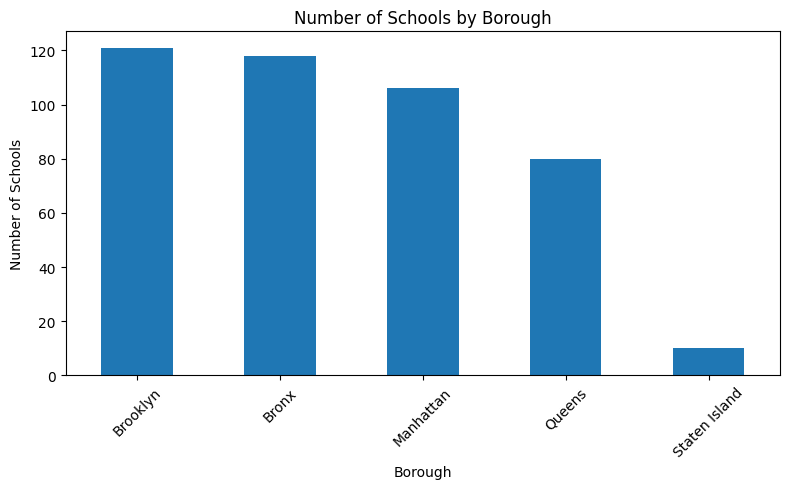

In [15]:
# 1. Number of schools by borough
plt.figure(figsize=(8,5))
df['borough'].value_counts().plot(kind='bar')
plt.title('Number of Schools by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Schools')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

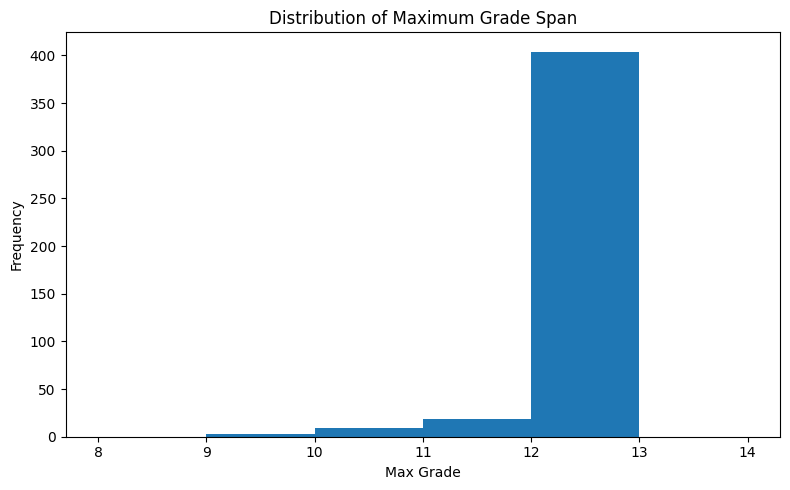

In [16]:
# 2. Distribution of maximum grade (grade_span_max)
plt.figure(figsize=(8,5))
df['grade_span_max'].dropna().astype(int).plot(kind='hist', bins=range(8,15))
plt.title('Distribution of Maximum Grade Span')
plt.xlabel('Max Grade')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

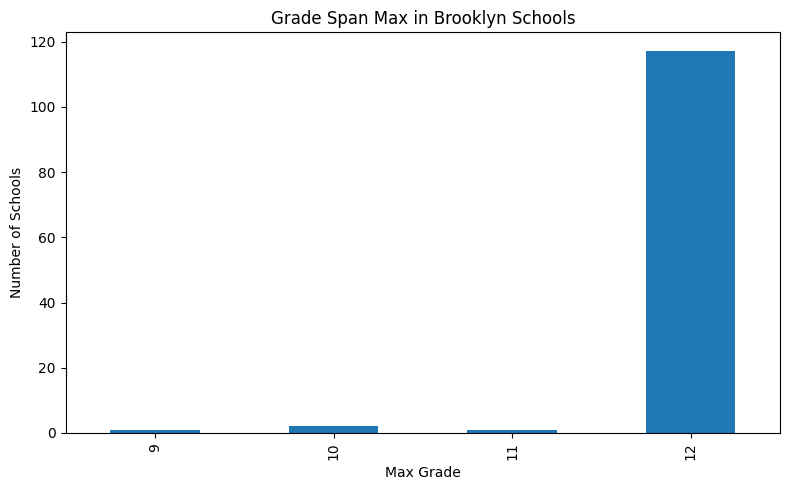

In [17]:
# 3. Grade span max distribution within Brooklyn
brooklyn = df[df['borough'].str.lower() == 'brooklyn']
plt.figure(figsize=(8,5))
brooklyn['grade_span_max'].dropna().astype(int).value_counts().sort_index().plot(kind='bar')
plt.title('Grade Span Max in Brooklyn Schools')
plt.xlabel('Max Grade')
plt.ylabel('Number of Schools')
plt.tight_layout()
plt.show()

## Conclusions & Notes
- Brooklyn has a substantial number of schools in this dataset.
- Grade 9 is the predominant entry grade across the city.
- Most schools top out at grade 12, consistent with standard high school completion.
- A small number of schools end earlier (e.g., grade 10 or 11), likely alternative or specialized programs.

These findings are based on simple filtering and grouping—great starting points for deeper exploration like admissions criteria, performance metrics, or geographic analysis.